In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = 'dataset/svm-linear-regression/Position_Salaries.csv'
df = pd.read_csv(file)

In [14]:
X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1].values

In [12]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#### Need to apply feature scaling cause unlike linear regression there is no implicit relation between feature and depednant variable

In [40]:
Y= Y.reshape(len(Y),1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [44]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [45]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [49]:
from sklearn.svm import SVR
rregressor = SVR(kernel = 'rbf')#radial basis function kernel
regressor.fit(X, Y)

/home/glen/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [53]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[252768.72566291]])

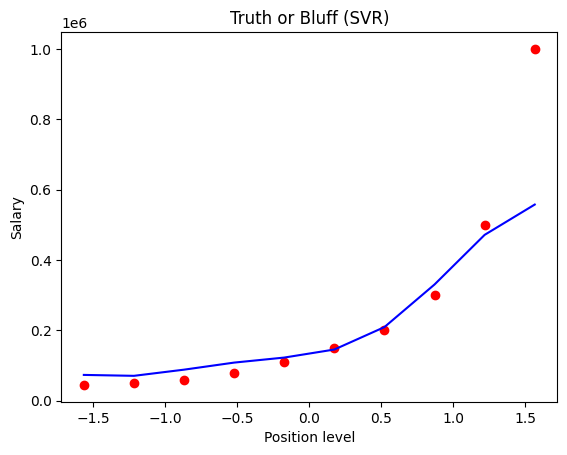

In [52]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()